Text(0.5,1,'Undistorted image')

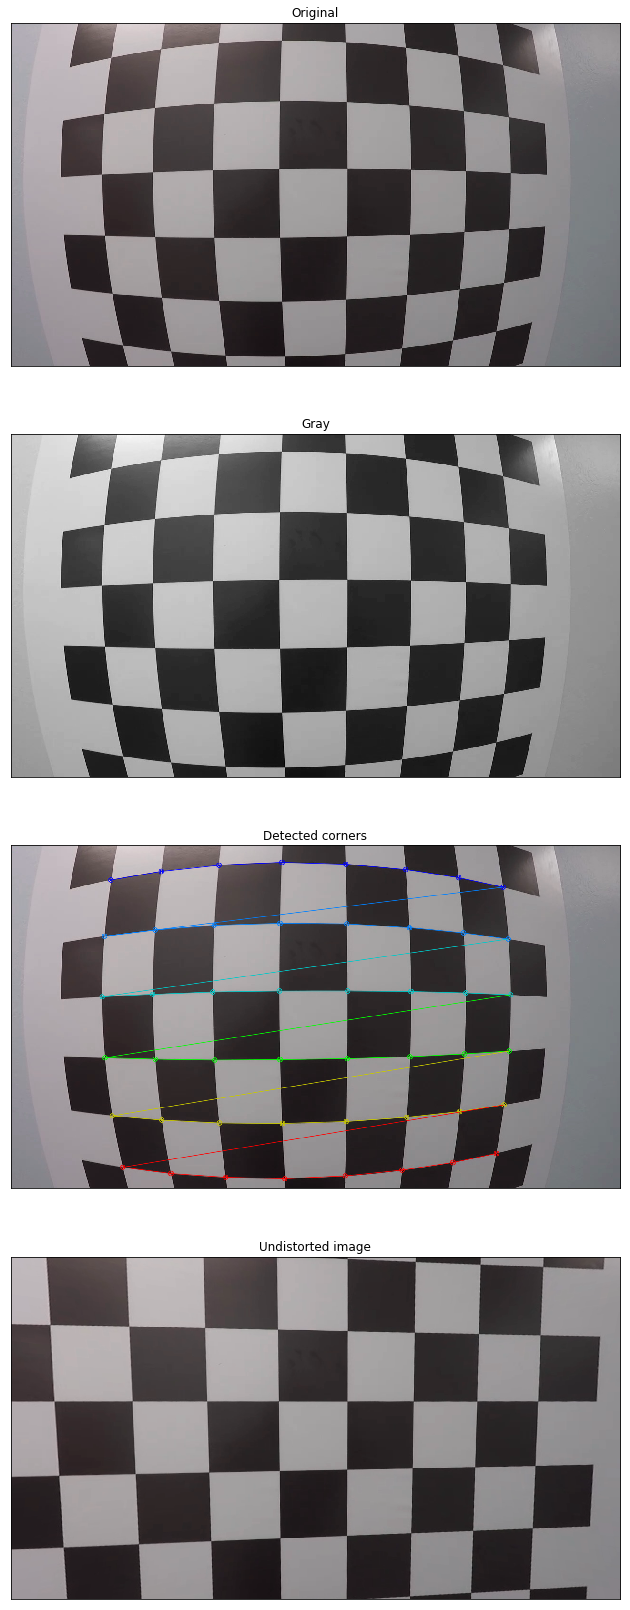

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# prepare object points
nx = 8#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = 'data/calibration_test.png'
img = cv2.imread(fname)
original = img.copy()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(12,29))
cols = 1
rows = 4

ax = fig.add_subplot(rows, cols, 1, xticks=[], yticks=[])
ax.imshow(img)
ax.set_title("Original")

ax = fig.add_subplot(rows, cols, 2, xticks=[], yticks=[])
ax.imshow(gray, cmap="gray")
ax.set_title("Gray")

objpoints = []
imgpoints = []

objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2) # creates and assigns a grid of 2D coordinates from 0..7 and 0..5

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    ax = fig.add_subplot(rows, cols, 3, xticks=[], yticks=[])
    ax.imshow(img)
    ax.set_title("Detected corners")
    
    imgpoints.append(corners)
    objpoints.append(objp)
    
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

dst = cv2.undistort(original, mtx, dist, None, mtx)
ax = fig.add_subplot(rows, cols, 4, xticks=[], yticks=[])
ax.imshow(dst)
ax.set_title("Undistorted image")
